# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pr = pd.read_csv('previsao_de_renda.csv')
pr.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [33]:
n_meses = 3
n_clientes = 210

datas = pd.Series(pd.date_range('1/1/2016', periods = n_meses, freq = 'MS').repeat(n_clientes))

dados = pr.sample(n = n_meses * n_clientes, replace=True).reset_index()

pr2 = pd.concat([datas, dados], axis = 1)
pr2.rename({0:'data'}, inplace = True, axis = 'columns')
pr2

,data,level_0,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2016-01-01,8893,8893,2015-09-01,12211,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,9.936986,2.0,False,1692.05
1,2016-01-01,14004,14004,2016-03-01,12633,F,False,True,0,Assalariado,Superior incompleto,Casado,Casa,29,11.038356,2.0,False,2243.27
2,2016-01-01,13796,13796,2016-02-01,8028,F,False,True,0,Assalariado,Superior completo,Casado,Casa,51,14.643836,2.0,False,5800.04
3,2016-01-01,4572,4572,2015-05-01,784,F,False,False,0,Empresário,Superior completo,Casado,Casa,30,7.027397,2.0,False,1059.84
4,2016-01-01,11509,11509,2015-12-01,2285,F,True,True,0,Pensionista,Secundário,Casado,Casa,54,NaN,2.0,False,2796.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2016-03-01,476,476,2015-01-01,3219,F,False,True,0,Pensionista,Secundário,Solteiro,Casa,59,NaN,1.0,False,3150.64
626,2016-03-01,1410,1410,2015-02-01,1487,M,False,False,0,Servidor público,Secundário,Casado,Casa,43,7.589041,2.0,False,4508.76
627,2016-03-01,7012,7012,2015-08-01,774,F,True,True,1,Empresário,Secundário,Casado,Casa,37,7.027397,3.0,False,1882.58
628,2016-03-01,11338,11338,2015-12-01,5350,F,False,True,0,Assalariado,Superior completo,Solteiro,Casa,46,13.104110,1.0,False,2536.39


In [34]:
pr2.drop(['data_ref'], axis=1)

,data,level_0,Unnamed: 0,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2016-01-01,8893,8893,12211,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,9.936986,2.0,False,1692.05
1,2016-01-01,14004,14004,12633,F,False,True,0,Assalariado,Superior incompleto,Casado,Casa,29,11.038356,2.0,False,2243.27
2,2016-01-01,13796,13796,8028,F,False,True,0,Assalariado,Superior completo,Casado,Casa,51,14.643836,2.0,False,5800.04
3,2016-01-01,4572,4572,784,F,False,False,0,Empresário,Superior completo,Casado,Casa,30,7.027397,2.0,False,1059.84
4,2016-01-01,11509,11509,2285,F,True,True,0,Pensionista,Secundário,Casado,Casa,54,NaN,2.0,False,2796.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2016-03-01,476,476,3219,F,False,True,0,Pensionista,Secundário,Solteiro,Casa,59,NaN,1.0,False,3150.64
626,2016-03-01,1410,1410,1487,M,False,False,0,Servidor público,Secundário,Casado,Casa,43,7.589041,2.0,False,4508.76
627,2016-03-01,7012,7012,774,F,True,True,1,Empresário,Secundário,Casado,Casa,37,7.027397,3.0,False,1882.58
628,2016-03-01,11338,11338,5350,F,False,True,0,Assalariado,Superior completo,Solteiro,Casa,46,13.104110,1.0,False,2536.39


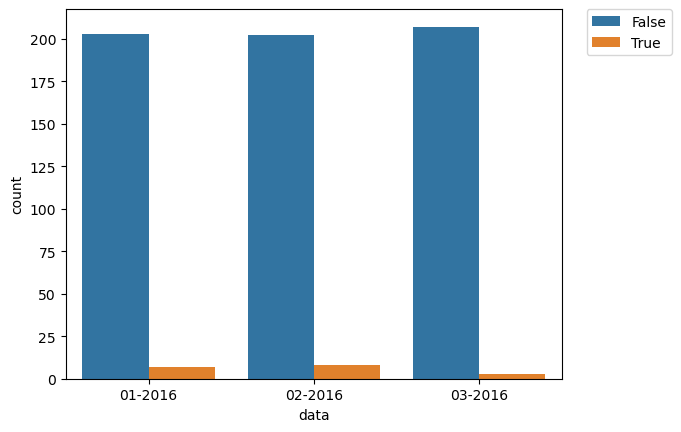

In [35]:
ax = sns.countplot(x = 'data', hue = 'mau', data=pr2)

tick_labs = pr2['data'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(pr2['data'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

A variavel mau, com a resposta True diminui ao longo dos três meses analisados

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

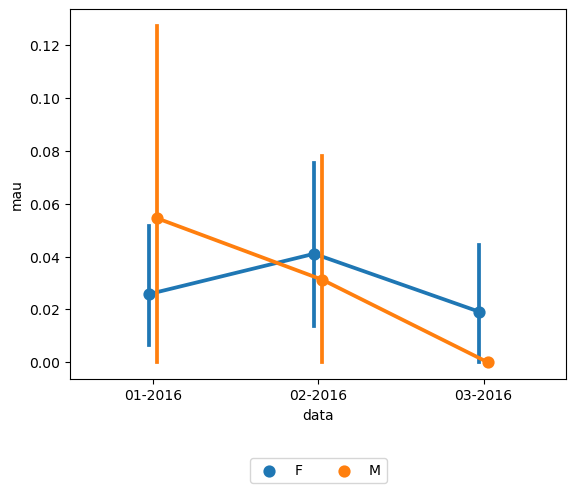

In [44]:
ax = sns.pointplot(x="data", y="mau", hue='sexo',
                  data=pr2, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

ticks_labs = pr2['data'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(pr2['data'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

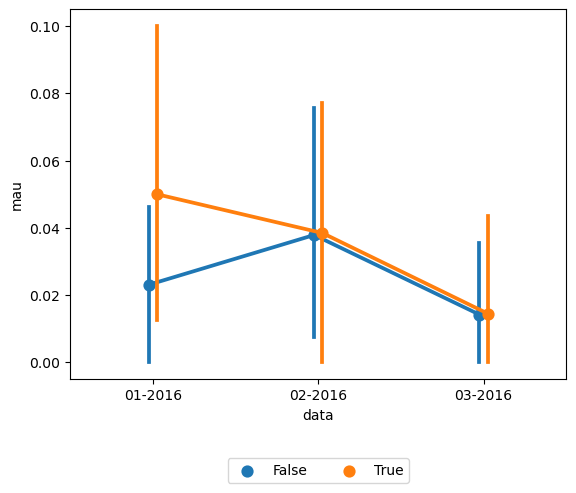

In [45]:
ax = sns.pointplot(x="data", y="mau", hue='posse_de_veiculo',
                  data=pr2, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

ticks_labs = pr2['data'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(pr2['data'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

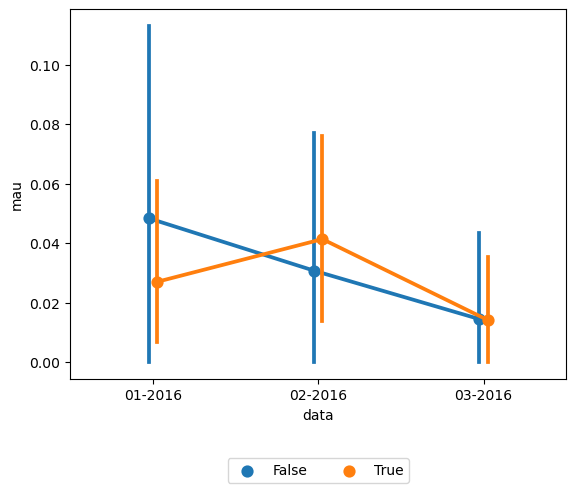

In [46]:
ax = sns.pointplot(x="data", y="mau", hue='posse_de_imovel',
                  data=pr2, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

ticks_labs = pr2['data'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(pr2['data'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

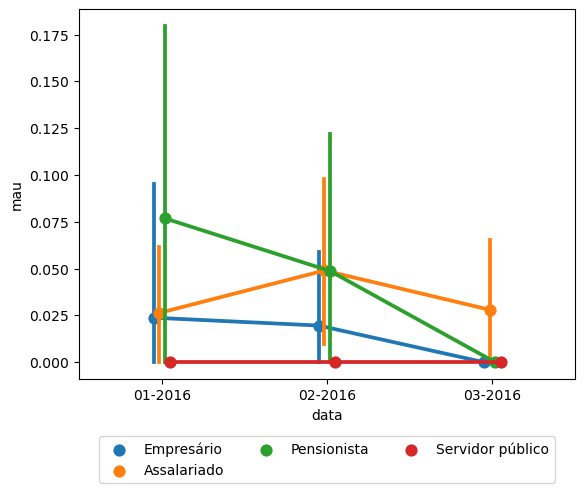

In [47]:
ax = sns.pointplot(x="data", y="mau", hue='tipo_renda',
                  data=pr2, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

ticks_labs = pr2['data'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(pr2['data'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

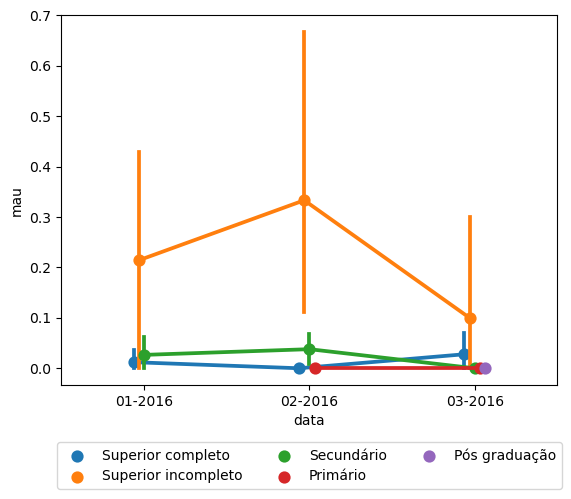

In [48]:
ax = sns.pointplot(x="data", y="mau", hue='educacao',
                  data=pr2, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

ticks_labs = pr2['data'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(pr2['data'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

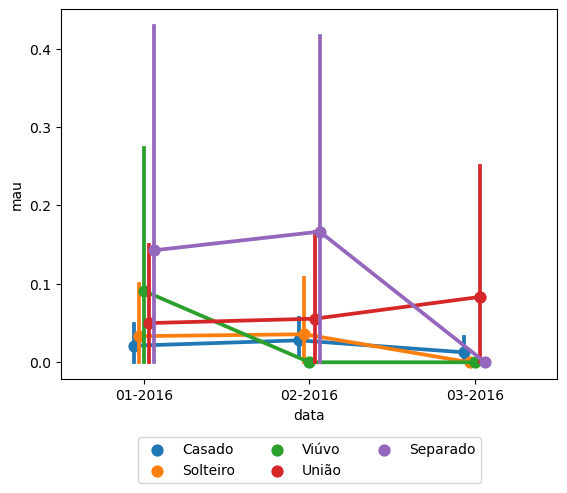

In [49]:
ax = sns.pointplot(x="data", y="mau", hue='estado_civil',
                  data=pr2, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

ticks_labs = pr2['data'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(pr2['data'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

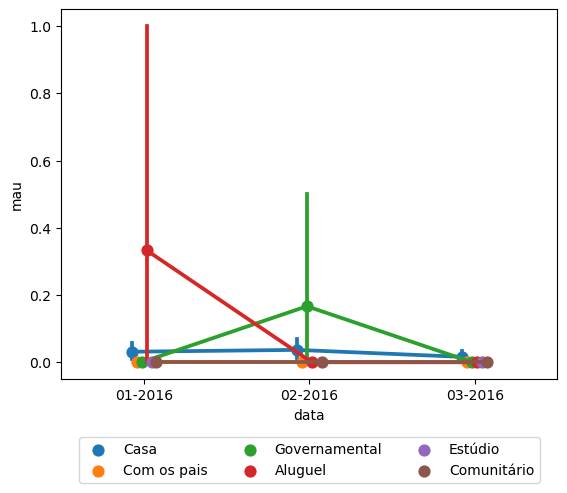

In [50]:
ax = sns.pointplot(x="data", y="mau", hue='tipo_residencia',
                  data=pr2, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

ticks_labs = pr2['data'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(pr2['data'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

Não ouve alterações importantes

Não todas as variaveis, utilizaria somente as que contém duas respostas, como a variavel sexo ou posse_de_veiculo